In [42]:
from hydra import compose, initialize
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [43]:
sim_names = {
    'drfp' : 'sprhea_v3_folded_pt_ns_drfp',
    'rcmcs' : 'sprhea_v3_folded_pt_ns_rcmcs',
    'mfp' : 'sprhea_v3_folded_pt_ns_tanimoto',

}

In [44]:
with initialize(version_base=None, config_path="../configs/filepaths"):
    filepaths = compose(config_name="base")

In [45]:
sim_mats = {}
for name, fname in sim_names.items():
    sim_mats[name] = np.load(Path(filepaths['similarity_matrices']) / f"{fname}.npy")

In [46]:
upper_tri_entries = {}
for key, mat in sim_mats.items():
    upper_tri_entries[key] = mat[np.triu_indices_from(mat, k=1)]

In [47]:
upper_tri_entries['rcmcs'].shape

(20862570,)

In [48]:
nz_rcmcs_entries = {}
for key, mat in upper_tri_entries.items():
    nz_rcmcs_entries[key] = mat[upper_tri_entries['rcmcs'] > 0]

In [53]:

def plot_sim_correlation(name1, name2, sims=upper_tri_entries, ds=100, save_to: str | None = None):
    fig, ax = plt.subplots(figsize=(6,6))
    ax.scatter(sims[name1][::ds], sims[name2][::ds], alpha=0.1)
    ax.set_xlabel(f"{name1.replace('_', ' ').upper()} similarity")
    ax.set_ylabel(f"{name2.replace('_', ' ').upper()} similarity")
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    plt.tight_layout()

    if save_to is not None:
        plt.savefig(Path(save_to) / f"{name1}_v_{name2}_sim_corr.svg", format='svg')

    plt.show()

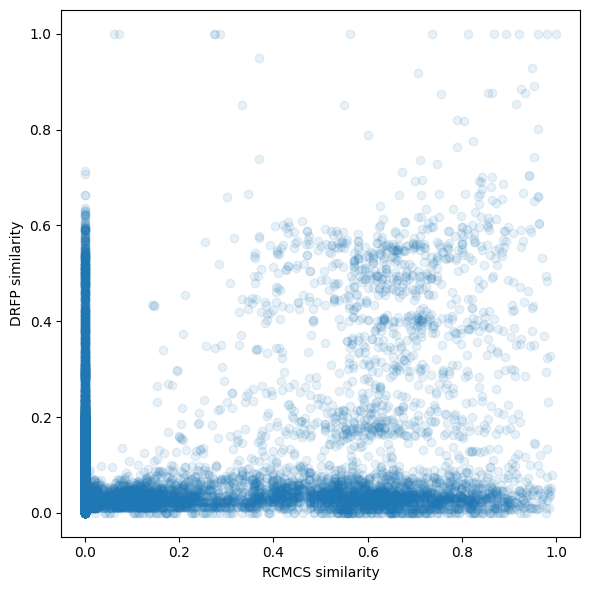

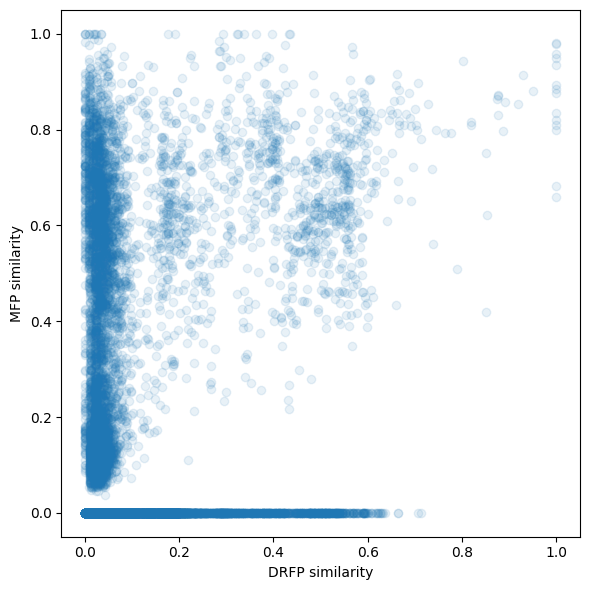

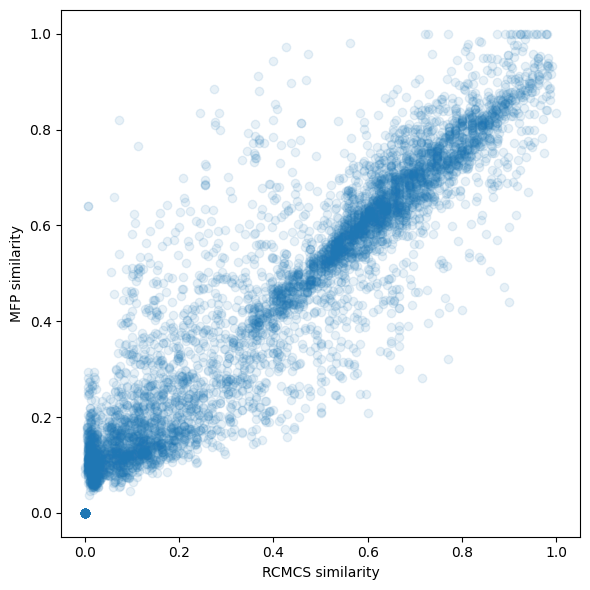

In [54]:
save_to = f"{filepaths.figures}/methods"
plot_sim_correlation('rcmcs', 'drfp', save_to=save_to)
plot_sim_correlation('drfp', 'mfp', save_to=save_to)
plot_sim_correlation('rcmcs', 'mfp', save_to=save_to)